# Topic modeling - Anomalous event detection

In [1]:
import numpy as np
import pandas as pd

Podatke koje ćemo analizirati smo preuzeli sa stranice https://github.com/tdhopper/topic-modeling-datasets/tree/master/data/lda-c/blei-ap. Skup podataka koji analiziramo se sastoji od 2250 tekstova vijesti o raznim temama. Vokabular koji koristimo se sastoji od 10473 riječi.

In [2]:
data = open("ap.txt", "r")

In [3]:
vocabular = open("vocab.txt", "r")

Predprocesiramo podatke da bi ih mogli koristiti kao ulazne parametre algoritama za modeliranje tema. Prvo pretvaramo riječnik u listu, pa zatim stvaramo matricu koja reprezentira sve dokumente iz skupa podataka.

In [4]:
i = 0
r = 0
while True:
    nstr = data.readline()
    nstr.strip()
    
    if len(nstr) == 0:
        break
        
    if nstr[0] == '<':
        continue
    if nstr[0] == ' ' and nstr[1] == '<':
        continue
        
    if r < 5 or i == 2200:
        print(nstr)
        r = r+1 
        
    i = i + 1

 A 16-year-old student at a private Baptist school who allegedly killed one teacher and wounded another before firing into a filled classroom apparently ``just snapped,'' the school's pastor said. ``I don't know how it could have happened,'' said George Sweet, pastor of Atlantic Shores Baptist Church. ``This is a good, Christian school. We pride ourselves on discipline. Our kids are good kids.'' The Atlantic Shores Christian School sophomore was arrested and charged with first-degree murder, attempted murder, malicious assault and related felony charges for the Friday morning shooting. Police would not release the boy's name because he is a juvenile, but neighbors and relatives identified him as Nicholas Elliott. Police said the student was tackled by a teacher and other students when his semiautomatic pistol jammed as he fired on the classroom as the students cowered on the floor crying ``Jesus save us! God save us!'' Friends and family said the boy apparently was troubled by his gran

In [5]:
print(i)

2249


In [6]:
data.close()
data = open("ap.txt", "r")

In [7]:
j = 0
while True:
    nstr = vocabular.readline()
    nstr.strip()
    
    if len(nstr) == 0:
        break
        
    j = j + 1
    
print(j)

10473


In [8]:
matrix = np.zeros((10473, 2250))

In [9]:
vocabular.close()
vocabular = open("vocab.txt", "r")

In [10]:
"""
vocab_array je lista riječi rječnika
"""
vocab_array = []
while True:
    nstr = vocabular.readline()
    nnstr = nstr.strip()
    
    if len(nnstr) == 0:
        break

    if nstr[0] == '<':
        continue
        
    vocab_array.append( nnstr )

In [11]:
vocabular.close()
vocabular = open("vocab.txt", "r")

U varijablu <code>matrix</code> spremamo matričnu reprezentaciju dokumenata. Svako pojavljivanje <code>i</code>-te riječi rječnika u <code>j</code>-om dokumentu povećava element <code>matrix</code>$_{ij}$ za 1. Dakle, j-ti stupac matrice reprezentira j-ti dokument.

In [12]:
k = 0
z = 0
while True:
    nstr = data.readline()
    nstr.strip()
    
    if len(nstr) == 0:
        break
        
    if nstr[0] == '<':
        continue
    if nstr[0] == ' ' and nstr[1] == '<':
        continue
    
    words = nstr.replace('.', ' ').replace(',', ' ').split(' ')

    for word in words:
        
        cword = word.lower()
        
        for l in range(10473):
            
            if( cword == vocab_array[l] ):
                matrix[l][k] = matrix[l][k] + 1
                break
                
    k = k + 1
print(k)

2249


In [13]:
c_matrix = matrix
print(c_matrix.shape)
l = 0
for j in range(2249):

    k = 0
    for i in range(10473):
        if(c_matrix[i][l] > 0):
            k = k + 1
    if k == 0:
        c_matrix = np.delete(c_matrix, l, 1)
    else:
        l = l + 1
        
print(l, c_matrix.shape)

(10473, 2250)
2246 (10473, 2247)


In [14]:
matrix.shape

(10473, 2250)

In [15]:
from sklearn.decomposition import NMF
model = NMF(n_components=3, init='random', random_state=0)
W = model.fit_transform( c_matrix )
H = model.components_

Odredimo prvo NMF-om kojim temama možemo najbolje opisati sve dokumente.

In [16]:
for j in range(len(W[i])):
    for i in range(10473):
        if(W[i][j] > 3):
            print(j, W[i][j], vocab_array[i])

0 5.293561586853502 new
0 27.42424236885543 percent
0 9.856895488847908 year
0 8.405420034476172 million
0 4.768830056146629 last
0 8.706627228228381 billion
0 4.124585611579803 market
0 3.2215506065902355 report
0 4.883169846029265 prices
0 4.413926662409332 sales
0 3.974283068234925 rose
0 3.669526399610713 rate
1 5.1787352494247845 i
1 4.779289960822729 new
1 7.756464724753017 people
1 6.090640270046828 two
1 3.558835510382749 million
1 3.7703654870085073 last
1 4.831629181755087 government
1 4.546620223599726 years
1 6.220990196093479 police
1 4.386569510414389 state
1 3.7479626495239318 officials
1 3.097480030261818 three
1 3.638169982551916 court
1 3.235206671696902 city
2 5.235592048827308 president
2 3.2669065146130456 states
2 5.86417694131389 soviet
2 3.684615296465797 united
2 6.899230037367382 bush


Vidimo da je NMF algoritam prepoznao sljedeće tri teme (teme opisujemo riječima koje se najčešće koriste u toj temi):
* Prva tema: percent, year, million, billion, new, last, market, report, prices, sales, rose, rate (ekonomija)
* Druga tema: people, two, million, government, years, police, state, officials, court (državne službe)
* Treća tema: president, states, soviet, united, bush (politika)

In [17]:
"""
Nenegativni najmanji kvadrati
"""
def ls( A, W):
    
    lamda = 0.5
    
    (n1, k1) = A.shape
    (n, k) = W.shape
    # proizvoljno inicijaliziramo H
    H = np.ones( (k,k1) )
    
    for z in range(1):
        
        # update-amo stupce matrice H
        B = np.zeros( (k,k) )
        B = W.transpose() @ W
            
        for i in range(k1):
        
            C = A[:, i].transpose() @ W            
            if( np.linalg.matrix_rank( B + lamda * np.eye(k) ) == k ):
                H[:, i] = C @ np.linalg.inv(B + lamda * np.eye(k) )
                
    (e, f) = H.shape
    for l in range(e):
        for v in range(f):
            if H[l][v] < 0:
                H[l][v] = 0
 
    return H

**STExNMF algoritam**: <br>
Ulaz: matrica $A_c$ koja opisuje centralne dokumente (one koje uspoređujemo s ostalim dokumentima), lista matrica koje opisuju ostale skupove dokumenata s kojma uspoređujemo centralne dokumente, koeficijent $\alpha$. <br>
Izlaz: matrica $W_{ex}$ koja opisuje teme po kojima se skup centralnih dokumenata razlikuje od ostalih skupova dokumenata (teme koje su karakteristične isključivo za centralni skup dokumenata) i matrica $H_{ex}$.
* Napravimo inicijalni topic modeling na svim susjednim matricama (npr. NMF).
* Izračunamo $W_N$ koristeći jednadžbu min$_{W_N \geq 0, H \geq 0} ||W_{ne}-W_NH||_F^2$ (npr. NMF), gdje je $W_{ne}$ matrica čiju su stupci teme dobivene iz predhodog koraka.
* Izračunamo $H_N$ iz jednadžbe min$_{H_N \geq 0} ||\alpha A_C - W_N H_N||_F^2$ (npr. nenegativni najmanji kvadrati).
* Izračunamo $R_C$ pomoću formule $R_C = [A_C -W_NH_N]_+$.
* Izračunamo $W_{ex}$ i $H_{ex}$ iz jednadžbe min$_{W_{ex} \geq 0, H_{ex} \geq 0} ||R_{C}-W_{ex}H_{ex}||_F^2$ (npr. NMF).

In [18]:
def ste_nmf( matrica, susjedne_matrice, k_ne, alpha ):
    
    # prvi korak: topic modeling s nmf
    # W, H topic modeling od glavne matrice
    # W_list, H_list liste matrica dobivene topic modelingom susjednih matrica
    model = NMF(n_components=k_ne, init='random', random_state=0)
    W = model.fit_transform( matrica )
    H = model.components_
    
    W_list = []
    H_list = []
    
    for i in range( k_ne ):
        
        model1 = NMF(n_components=3, init='random', random_state=0)
        W_susjedne = model1.fit_transform( susjedne_matrice[i] )
        H_susjedne = model1.components_
        
        W_list.append( W_susjedne )
        H_list.append( H_susjedne )
        
    # drugi korak: dobiti W_N iz susjednih matrica
    
    W_ne = W_list[0]
    
    for j in range( len( W_list) - 1 ):
        np.concatenate((W_ne, W_list[j + 1]), axis=1)
        
    model = NMF(n_components=3, init='random', random_state=0)
    W_N = model.fit_transform( W_ne )
    H_pom = model.components_
    
    # treci korak: H_N iz A_c i W_N non-negative least square
    H_N = ls( alpha * matrica, W_N )
    
    # cetvrti korak: R_C = A_c - W_N*H_N
    R_C = matrica - W_N @ H_N
    
    (r, c) = R_C.shape
    for i in range(r):
        for j in range(c):
            if R_C[i][j] < 0:
                R_C[i][j] = 0
    
    # peti korak: nmf na R_C
    model = NMF(n_components=3, init='random', random_state=0)
    W_ex = model.fit_transform( R_C )
    H_ex = model.components_
    
    return (W_ex, H_ex)

Podijelimo sada prvih 2000 dokumenata u 5 grupa (svaka po 400 dokumenata). Zatim probajmo odrediti koje teme se pojavljuju u prvoj grupi, a ne pojavljuju se u ostalim grupama pomoću STExNMF algoritma.

In [19]:
m_matrix = []

A_c = c_matrix[:,:400]

for i in range(4): 
    m_matrix.append( c_matrix[:,(400*(i+1)):(400*(i+2))])

In [20]:
m_matrix[0].shape

(10473, 400)

In [21]:
(W, H) = ste_nmf( A_c, m_matrix, 3, 0.5)

C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


In [22]:
W.shape, H.shape

((10473, 3), (3, 400))

In [23]:
for j in range(len(W[i])):
    for i in range(10473):
        if(W[i][j] > 4):
            print(j, W[i][j], vocab_array[i])

0 11.202353070305504 new
0 5.2771213114707125 two
0 5.552614485498783 million
0 6.349113277895146 government
0 5.054897889329683 police
0 4.704044747240703 state
0 5.045607840214022 officials
0 9.29388754030282 soviet
0 4.436684475325572 company
0 4.992099807301652 party
0 5.735142356904334 union
1 14.266614360299103 percent
1 5.39800827460144 prices
1 4.009111716045827 rate
2 9.683562561006452 i
2 4.783716775934787 people
2 6.166530828605664 bush


Za $\alpha = 0.5$ još uvijek dobivamo slične teme kao za $\alpha = 0.1$. Primjetimo da je tema "državne službe" sada doblia neka politička obilježja.

In [24]:
(W1, H1) = ste_nmf( A_c, m_matrix, 3, 0.1)

In [25]:
for j in range(len(W1[i])):
    for i in range(10473):
        if(W1[i][j] > 4):
            print(j, W1[i][j], vocab_array[i])

0 13.526238827646232 new
0 4.688813320729919 people
0 4.603342168056464 year
0 6.800929748839333 two
0 7.695493332388656 million
0 4.280028155137246 last
0 7.93499534983808 police
0 6.349774374935117 state
0 5.023266877436142 officials
0 5.610354070502784 court
0 4.174075938977541 day
0 6.084972565841875 company
0 4.310793071427091 city
0 4.334363783428326 york
0 4.500036104435555 bank
1 19.087347094052607 percent
1 4.055841210700189 year
1 5.666862443467246 prices
1 4.173888691832099 rate
2 5.792618285729481 i
2 4.786874769781859 people
2 4.638633297386871 president
2 4.249592855236345 government
2 8.148694084268634 soviet
2 6.248293162524442 bush


Za $\alpha =0.1$ dobivamo vrlo slične teme kao i u inicijalnom topic modelingu što je i očekivano za mali $\alpha$. Možemo primjetiti da je tema koju smo nazvali "državne službe" uključila i druge institucije (banke, kompanije).

In [26]:
(W2, H2) = ste_nmf( A_c, m_matrix, 3, 0.9)

In [27]:
for j in range(len(W2[i])):
    for i in range(10473):
        if(W2[i][j] > 3):
            print(j, W2[i][j], vocab_array[i])

0 13.150546887514906 i
0 6.426571860572141 people
0 3.416627667351174 year
0 3.3701379271323364 years
0 3.947909146418616 state
0 6.089709520194346 bush
0 3.2905641118700406 told
0 3.2470109035927273 house
0 3.1001189782124365 court
0 3.455941575651616 day
0 3.610341936101882 going
0 4.6006918042049145 get
0 5.206499557649845 think
0 3.269857174689544 back
0 3.296397800598192 dukakis
0 3.0095481527607952 campaign
0 3.968451320412492 administration
1 9.280215914071048 new
1 4.678133122656951 million
1 5.207180154015726 company
1 3.5044899691108946 york
1 4.544445446020247 bank
2 4.688991744046598 government
2 9.608826577745193 soviet
2 5.307179052939781 party
2 3.4712300697774907 union
2 3.9659109654238653 gorbachev


Pogledajmo koje teme dobivamo za $\alpha = 0.9$:
* Prva tema: people, bush, house, court, dukakis, campaign, administration (izborna kampanja)
* Druga tema: new, million, company, bank (kompanije i banke)
* Treća tema: government, soviet, party, union, gorbachev (Sovjetski savez/nekad vanjska politika)

Dobili smo konkretne teme po kojima se prva grupa dokumenata razlikuje od ostalih. Prije smo rekli da svi dokumenti govore o ekonomiji, sada vidimo da prva grupa govori konkretno o kompanijama i bankama. Slično smo imali i temu vanjske politkike u svim dokumentima, a u prvoj grupi dokumenata se govori o Sovjetskom savezu. Otkrivamo i novu temu izborne kampanje (Dukakis vs. Bush).

### Topic variation score

Topic variation score se definira formulom: $T_v(C_{\alpha}, C_I) = 1 - \frac{|C_{\alpha} \cap C_I|}{|C_{\alpha} \cup C_I|}$,
gdje $C_{\alpha}$ označava skup ključnih riječi koje smo dobili primjenom STExNMF algoritma, a $C_I$ označava skup ključnih riječi koje smo dobili inicijalnim topic modelingom.

Topic variation score određuje koliko se teme dobivene sa STExNMF algoritmom razlikuju od tema dobivenih sa standardnim NMF-om. U našem slučaju korisno je vidjeti kako raznolikost dobivenih tema ovisi o parametru $\alpha$.

In [28]:
from sklearn.decomposition import NMF
model = NMF(n_components=3, init='random', random_state=0)
W = model.fit_transform( A_c )
H = model.components_

In [29]:
for j in range(len(W[i])):
    for i in range(10473):
        if(W[i][j] > 3):
            print(j, W[i][j], vocab_array[i])

0 4.566699470770084 new
0 31.082936322796222 percent
0 7.1163958817335375 year
0 5.928669219235339 last
0 3.1867492988713466 billion
0 3.1269952783474606 report
0 3.2571192266903433 department
0 8.889731656753028 prices
0 5.783652803527778 month
0 5.399468944155843 oil
0 5.905302618154619 rose
0 3.704942235824789 price
0 6.489980397793733 rate
0 3.082200409767084 increase
0 3.0554833588406862 production
0 4.643543187910931 november
0 3.3693618334477633 september
0 4.296395107085822 october
0 4.932962704231332 inflation
1 9.668558210106976 i
1 5.372460412693719 people
1 5.078807977559409 president
1 9.596104357546249 bush
1 3.1891749986323945 american
1 3.1615278066600845 house
1 3.1461309198808234 going
1 4.258176094415825 think
1 4.140559067997399 dukakis
1 3.2729200422820908 campaign
1 3.4610249116091953 administration
2 7.5504596340442305 new
2 3.6014658052859057 people
2 4.542950547522271 two
2 3.5786073598724584 million
2 4.210883138388753 government
2 4.7737306258042596 police
2 

Uzimajući u obzir 17 ključnih riječi, dobivamo sljedeće rezultate ovisno o $\alpha$:
* $T_{0.1} = 0.52$
* $T_{0.5} = 0.64$
* $T_{0.9} = 0.83$

Text(0, 0.5, '$T_{\\alpha}$')

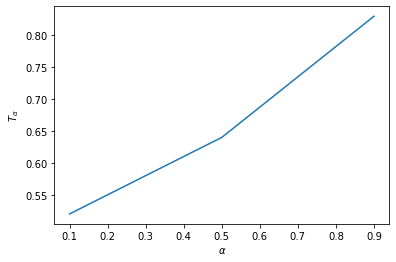

In [38]:
from matplotlib import pyplot as plt
plt.plot([0.1, 0.5, 0.9], [0.52, 0.64, 0.83])
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$T_{\alpha}$')